# Case Study World Bank Data
In this notebook we'll be using __*dictionaries, ziping, user defined functions, iterators, list comprehensions and generators*__ to wrangle and extract meaningful information from a real world dataset, the world bank wealth development indicators dataset: <a href="https://datacatalog.worldbank.org/dataset/world-development-indicators">World Development Indicators</a>. This dataset contains data on 270 world economies for over half a century from 1960 to 2015, it contains indicators like:
* Population
* Electricity consumption
* CO2 emissions
* Literacy rates
* Unemployment
* Mortality rates

## Warming up
### Dictionaries for data science
For this exercise, you'll use what you've learned about the zip() function and combine two lists into a dictionary.

These lists are actually extracted from a bigger dataset file of world development indicators from the World Bank. For pedagogical purposes, we have pre-processed this dataset into the lists that you'll be working with.

The first list feature_names contains header names of the dataset and the second list row_vals contains actual values of a row from the dataset, corresponding to each of the header names.

In [33]:
file_world_ind_pop_data = '../_datasets/world_ind_pop_data.csv'

In [31]:
# Pre-processed list from the dataset
feature_names = ['CountryName','CountryCode','IndicatorName','IndicatorCode','Year','Value']
row_vals = ['Arab World','ARB','Adolescent fertility rate (births per 1,000 women ages 15-19)','SP.ADO.TFRT','1960','133.56090740552298']

row_lists = [['Arab World','ARB','Adolescent fertility rate (births per 1,000 women ages 15-19)','SP.ADO.TFRT','1960','133.56090740552298'],
             ['Arab World','ARB','Age dependency ratio (% of working-age population)','SP.POP.DPND','1960','87.7976011532547'],
             ['Arab World','ARB','Age dependency ratio, old (% of working-age population)','SP.POP.DPND.OL','1960','6.634579191565161'],
             ['Arab World','ARB','Age dependency ratio, young (% of working-age population)','SP.POP.DPND.YG','1960','81.02332950839141'],
             ['Arab World','ARB','Arms exports (SIPRI trend indicator values)','MS.MIL.XPRT.KD','1960','3000000.0'],
             ['Arab World','ARB','Arms imports (SIPRI trend indicator values)','MS.MIL.MPRT.KD','1960','538000000.0'],
             ['Arab World','ARB','Birth rate, crude (per 1,000 people)','SP.DYN.CBRT.IN','1960','47.697888095096395'],
             ['Arab World','ARB','CO2 emissions (kt)','EN.ATM.CO2E.KT','1960','59563.9892169935'],
             ['Arab World','ARB','CO2 emissions (metric tons per capita)','EN.ATM.CO2E.PC','1960','0.6439635478877049'],
             ['Arab World','ARB','CO2 emissions from gaseous fuel consumption (% of total)','EN.ATM.CO2E.GF.ZS','1960','5.041291753975099'],
             ['Arab World','ARB','CO2 emissions from liquid fuel consumption (% of total)','EN.ATM.CO2E.LF.ZS','1960','84.8514729446567'],
             ['Arab World','ARB','CO2 emissions from liquid fuel consumption (kt)','EN.ATM.CO2E.LF.KT','1960','49541.707291032304'],
             ['Arab World','ARB','CO2 emissions from solid fuel consumption (% of total)','EN.ATM.CO2E.SF.ZS','1960','4.72698138789597'],
             ['Arab World','ARB','Death rate, crude (per 1,000 people)','SP.DYN.CDRT.IN','1960','19.7544519237187'],
             ['Arab World','ARB','Fertility rate, total (births per woman)','SP.DYN.TFRT.IN','1960','6.92402738655897'],
             ['Arab World','ARB','Fixed telephone subscriptions','IT.MLT.MAIN','1960','406833.0'],
             ['Arab World','ARB','Fixed telephone subscriptions (per 100 people)','IT.MLT.MAIN.P2','1960','0.6167005703199'],
             ['Arab World','ARB','Hospital beds (per 1,000 people)','SH.MED.BEDS.ZS','1960','1.9296220724398703'],
             ['Arab World','ARB','International migrant stock (% of population)','SM.POP.TOTL.ZS','1960','2.9906371279862403'],
             ['Arab World','ARB','International migrant stock, total','SM.POP.TOTL','1960','3324685.0']]

In [10]:
# Zip lists: zipped_lists
zipped_lists = list(zip(feature_names,row_vals))
zipped_lists

[('CountryName', 'Arab World'),
 ('CountryCode', 'ARB'),
 ('IndicatorName',
  'Adolescent fertility rate (births per 1,000 women ages 15-19)'),
 ('IndicatorCode', 'SP.ADO.TFRT'),
 ('Year', '1960'),
 ('Value', '133.56090740552298')]

In [7]:
# Create a dictionary: rs_dict
rs_dict = dict(zipped_lists)
rs_dict

{'CountryName': 'Arab World',
 'CountryCode': 'ARB',
 'IndicatorName': 'Adolescent fertility rate (births per 1,000 women ages 15-19)',
 'IndicatorCode': 'SP.ADO.TFRT',
 'Year': '1960',
 'Value': '133.56090740552298'}

In [11]:
def lists2dict(list1, list2):
    """Return a dictionary where list1 provides
    the keys and list2 provides the values."""

    # Zip lists: zipped_lists
    zipped_lists = zip(list1, list2)

    # Create a dictionary: rs_dict
    rs_dict = dict(zipped_lists)

    # Return the dictionary
    return rs_dict

### Using a list comprehension
Use a list comprehension to generate a list of dicts, where the keys are the header names and the values are the row entries.

In [16]:
# Print the first two lists in row_lists
print(row_lists[0])
print(row_lists[1])

['Arab World', 'ARB', 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'SP.ADO.TFRT', '1960', '133.56090740552298']
['Arab World', 'ARB', 'Age dependency ratio (% of working-age population)', 'SP.POP.DPND', '1960', '87.7976011532547']


In [23]:
# Turn list of lists into list of dicts usin List Comprehension
list_of_dicts = [lists2dict(feature_names,sublist) for sublist in row_lists]

list_of_dicts[0]

{'CountryName': 'Arab World',
 'CountryCode': 'ARB',
 'IndicatorName': 'Adolescent fertility rate (births per 1,000 women ages 15-19)',
 'IndicatorCode': 'SP.ADO.TFRT',
 'Year': '1960',
 'Value': '133.56090740552298'}

### Turning this all into a DataFrame
Now use of all these to convert the list of dictionaries into a pandas DataFrame.

In [28]:
# Import the pandas package
import pandas as pd

# Turn list of dicts into a DataFrame: df
df = pd.DataFrame(list_of_dicts)
df.head()

,CountryCode,CountryName,IndicatorCode,IndicatorName,Value,Year
0,ARB,Arab World,SP.ADO.TFRT,"Adolescent fertility rate (births per 1,000 wo...",133.56090740552298,1960
1,ARB,Arab World,SP.POP.DPND,Age dependency ratio (% of working-age populat...,87.7976011532547,1960
2,ARB,Arab World,SP.POP.DPND.OL,"Age dependency ratio, old (% of working-age po...",6.634579191565161,1960
3,ARB,Arab World,SP.POP.DPND.YG,"Age dependency ratio, young (% of working-age ...",81.02332950839141,1960
4,ARB,Arab World,MS.MIL.XPRT.KD,Arms exports (SIPRI trend indicator values),3000000.0,1960


## Using Python generators for streaming data
### Processing data in chunks
Data sources can be so large in size that *__storing the entire dataset in memory becomes too resource-intensive__*. In this case, it would be useful to use generators. Generators allow users to <a href="http://www.blog.pythonlibrary.org/2014/01/27/python-201-an-intro-to-generators/">lazily evaluate data</a>. This concept of lazy evaluation is useful when you have to deal with very large datasets because *__it lets you generate values in an efficient manner by yielding only chunks of data at a time instead of the whole thing at once__*.

We will define a generator function read_large_file() that produces a generator object which yields a single line from a file each time next() is called on it

In [32]:
def read_large_file(file_object):
    """A generator function to read a large file lazily."""

    # Loop indefinitely until the end of the file
    while True:

        # Read a line from the file: data
        data = file_object.readline()

        # Break if this is the end of the file
        if not data:
            break

        # Yield the line of data
        yield data

In [35]:
# Open a connection to the file
with open(file_world_ind_pop_data) as file:

    # Create a generator object for the file: gen_file
    gen_file = read_large_file(file)

    # Print the first three lines of the file
    print(next(gen_file))
    print(next(gen_file))
    print(next(gen_file))

CountryName,CountryCode,Year,Total Population,Urban population (% of total)

Arab World,ARB,1960,92495902.0,31.285384211605397

Caribbean small states,CSS,1960,4190810.0,31.5974898513652



Note that when you open a connection to a file, __the resulting file object is already a generator!__. So, you won't have to explicitly create generator objects in cases such as this.

Now let's process the World Bank dataset file line by line, to create a dictionary of the counts of how many times each country appears in a column in the dataset.

In [48]:
# Initialize an empty dictionary: counts_dict
counts_dict = {}

# Open a connection to the file
with open(file_world_ind_pop_data) as file:

    # Iterate over the generator. Remember opening a connection to a file is a Generator
    for line in file:

        row = line.split(',')
        first_col = row[0]

        if first_col in counts_dict.keys():
            counts_dict[first_col] += 1
        else:
            counts_dict[first_col] = 1

counts_dict

{'CountryName': 1,
 'Arab World': 55,
 'Caribbean small states': 55,
 'Central Europe and the Baltics': 55,
 'East Asia & Pacific (all income levels)': 55,
 'East Asia & Pacific (developing only)': 55,
 'Euro area': 55,
 'Europe & Central Asia (all income levels)': 55,
 'Europe & Central Asia (developing only)': 55,
 'European Union': 55,
 'Fragile and conflict affected situations': 55,
 'Heavily indebted poor countries (HIPC)': 55,
 'High income': 55,
 'High income: nonOECD': 55,
 'High income: OECD': 55,
 'Latin America & Caribbean (all income levels)': 55,
 'Latin America & Caribbean (developing only)': 55,
 'Least developed countries: UN classification': 55,
 'Low & middle income': 55,
 'Low income': 55,
 'Lower middle income': 55,
 'Middle East & North Africa (all income levels)': 55,
 'Middle East & North Africa (developing only)': 55,
 'Middle income': 55,
 'North America': 55,
 'OECD members': 55,
 'Other small states': 55,
 'Pacific island small states': 55,
 'Small states': 5

## Using pandas read_csv iterator for streaming data

### Reading files in chunks using iterators

* read_csv() function and chunksize argument
* Look at specific indicators in specific countries
* Write a function to generalize tasks

Another way to read data too large to store in memory in chunks is to read the file in as DataFrames of a certain length, say, 100. For example, with the pandas package (imported as pd), you can do pd.read_csv(filename, chunksize=100). This creates an iterable reader object, which means that you can use next() on it.

In [56]:
# Initialize reader object: df_reader
df_reader = pd.read_csv(file_world_ind_pop_data, chunksize=10)

In [57]:
# Print the first chunk
next(df_reader)

,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
0,Arab World,ARB,1960,9.249590e+07,31.285384
1,Caribbean small states,CSS,1960,4.190810e+06,31.597490
2,Central Europe and the Baltics,CEB,1960,9.140158e+07,44.507921
3,East Asia & Pacific (all income levels),EAS,1960,1.042475e+09,22.471132
4,East Asia & Pacific (developing only),EAP,1960,8.964930e+08,16.917679
5,Euro area,EMU,1960,2.653965e+08,62.096947
6,Europe & Central Asia (all income levels),ECS,1960,6.674890e+08,55.378977
7,Europe & Central Asia (developing only),ECA,1960,1.553174e+08,38.066129
8,European Union,EUU,1960,4.094985e+08,61.212898
9,Fragile and conflict affected situations,FCS,1960,1.203546e+08,17.891972


In [59]:
# Print the second chunk
next(df_reader)

,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
20,Middle East & North Africa (all income levels),MEA,1960,1.055126e+08,34.951334
21,Middle East & North Africa (developing only),MNA,1960,9.786942e+07,33.875012
22,Middle income,MIC,1960,1.970185e+09,22.053114
23,North America,NAC,1960,1.986244e+08,69.918403
24,OECD members,OED,1960,7.866482e+08,62.480915
25,Other small states,OSS,1960,6.590560e+06,14.337844
26,Pacific island small states,PSS,1960,8.613780e+05,22.043762
27,Small states,SST,1960,1.164275e+07,21.120573
28,South Asia,SAS,1960,5.720361e+08,16.735545
29,Sub-Saharan Africa (all income levels),SSF,1960,2.282688e+08,14.631387


### Writing an iterator to load data in chunks
To process the data, we will create another DataFrame composed of only the rows from specific country. We will then zip together two of the columns from the new DataFrame, __'Total Population'__ and __'Urban population (% of total)'__. Then, we will create a list of tuples from the zip object, where each tuple is composed of a value from each of the two columns mentioned.

We'll be using a list comprehension to create the values for a new column __'Total Urban Population'__ from the list of tuples. The values in this new column are the product of the first and second element in each tuple. 'Total Urban Population' should only be able to take on integer values.

Finally, we will plot the data from this new column to create a visualization of the urban population data.

In [61]:
# Initialize reader object
urb_pop_reader = pd.read_csv(file_world_ind_pop_data, chunksize=1000)
# Get the first DataFrame chunk
df_urb_pop = next(urb_pop_reader)
# Check out the head of the DataFrame
df_urb_pop.head()

,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
0,Arab World,ARB,1960,9.249590e+07,31.285384
1,Caribbean small states,CSS,1960,4.190810e+06,31.597490
2,Central Europe and the Baltics,CEB,1960,9.140158e+07,44.507921
3,East Asia & Pacific (all income levels),EAS,1960,1.042475e+09,22.471132
4,East Asia & Pacific (developing only),EAP,1960,8.964930e+08,16.917679


In [112]:
# Check out specific country: df_pop_ceb
df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode']=='CEB']
df_pop_ceb

,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
2,Central Europe and the Baltics,CEB,1960,91401583.0,44.507921
244,Central Europe and the Baltics,CEB,1961,92237118.0,45.206665
486,Central Europe and the Baltics,CEB,1962,93014890.0,45.866565
728,Central Europe and the Baltics,CEB,1963,93845749.0,46.534093
970,Central Europe and the Baltics,CEB,1964,94722599.0,47.208743


In [67]:
# Zip DataFrame columns of interest: Total Population and Urban population (% of total)
pops = zip(df_pop_ceb['Total Population'], df_pop_ceb['Urban population (% of total)'])
# Turn zip object into list: pops_list
pops_list = list(pops)

pops_list

[(91401583.0, 44.5079211390026),
 (92237118.0, 45.206665319194),
 (93014890.0, 45.866564696018),
 (93845749.0, 46.5340927663649),
 (94722599.0, 47.2087429803526)]

In [73]:
# Use list comprehension to create new DataFrame column 'Total Urban Population'
df_pop_ceb['Total Urban Population'] = [(int)(e[0]*e[1]*.01) for e in pops_list]

C:\Users\mgatt\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


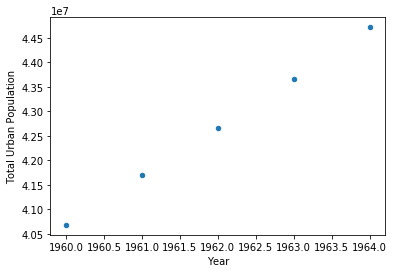

In [76]:
# Import the pandas package
import matplotlib.pyplot as plt
# Plot urban population data
df_pop_ceb.plot(kind='scatter', x='Year', y='Total Urban Population')
plt.show()

### Bringing_it_all_together!
We will put all the code for processing the data into a single function so that we can reuse the code without having to rewrite the same things all over again.

In [116]:
# Define plot_pop()
def plot_pop(filename, country_code):
    """A function to Create the new column of urban population values, and
Plot the urban population data"""
    
    # Initialize reader object: urb_pop_reader
    urb_pop_reader = pd.read_csv(filename, chunksize=1000)

    # Initialize empty DataFrame: data
    data = pd.DataFrame()
    
    # Iterate over each DataFrame chunk
    for df_urb_pop in urb_pop_reader:
        # Check out specific country: df_pop_ceb
        df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == country_code]
        
        # Getting the Country name
        country_name = df_pop_ceb['CountryName'].head(1).item()
        
        # Zip DataFrame columns of interest: pops
        pops = zip(df_pop_ceb['Total Population'],
                    df_pop_ceb['Urban population (% of total)'])

        # Turn zip object into list: pops_list
        pops_list = list(pops)

        # Use list comprehension to create new DataFrame column 'Total Urban Population'
        df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
    
        # Append DataFrame chunk to data: data
        data = data.append(df_pop_ceb)

    # Plot urban population data
    data.plot(kind='scatter', x='Year', y='Total Urban Population')
    plt.title(country_code+" - "+country_name)
    plt.show()

C:\Users\mgatt\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


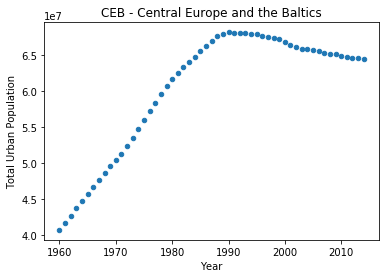

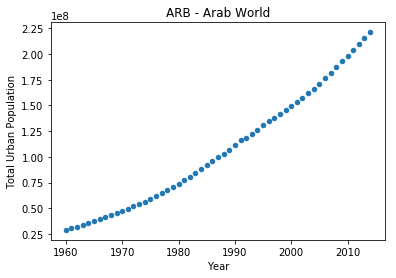

In [117]:
# Call plot_pop for country code 'CEB'
plot_pop(file_world_ind_pop_data,'CEB')

# Call plot_pop for country code 'ARB'
plot_pop(file_world_ind_pop_data,'ARB')